In [30]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

In [3]:
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


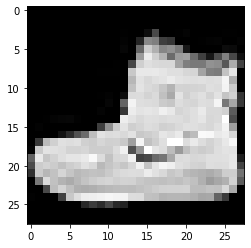

In [9]:
plt.imshow(x_train[0], cmap='gray')

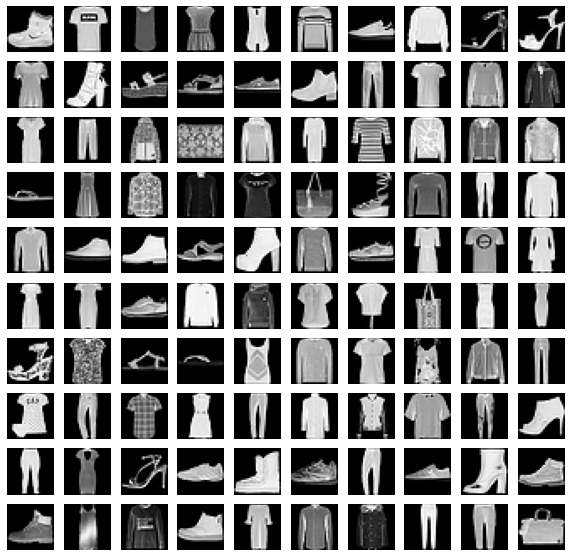

In [11]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')

In [15]:
label_list=np.zeros(10)
for i in range(len(t_train)):
    label = int(t_train[i])
    label_list[label]+=1
print(label_list)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [32]:
x_train = (x_train-0.0)/(255.0-0.0)
x_test = (x_test-0.0)/(255.0-0.0)
t_train = to_categorical(t_train, num_classes=10)
t_test = to_categorical(t_test, num_classes=10)

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
hist = model.fit(x_train, t_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.8167 - accuracy: 0.7358 - val_loss: 0.5821 - val_accuracy: 0.8087
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5307 - accuracy: 0.8236 - val_loss: 0.5010 - val_accuracy: 0.8318
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4739 - accuracy: 0.8390 - val_loss: 0.4611 - val_accuracy: 0.8424
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4436 - accuracy: 0.8474 - val_loss: 0.4433 - val_accuracy: 0.8473
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4225 - accuracy: 0.8553 - val_loss: 0.4316 - val_accuracy: 0.8489
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4070 - accuracy: 0.8603 - val_loss: 0.4159 - val_accuracy: 0.8565
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3948 - accuracy: 0.8634 - val_loss: 0.4069 - val_accuracy:

In [19]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 821us/step - loss: 0.3632 - accuracy: 0.8765


[0.36323603987693787, 0.8765000104904175]

In [20]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 708us/step


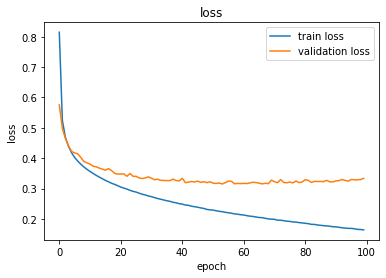

In [21]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

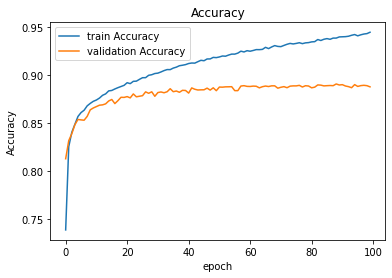

In [22]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')

<AxesSubplot:>

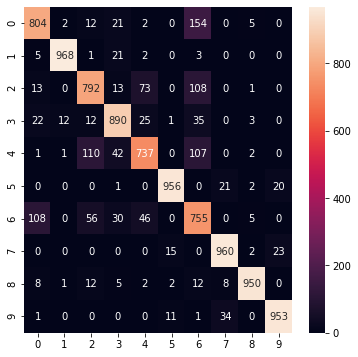

In [25]:
plt.figure(figsize=(6, 6))
cm = confusion_matrix(np.argmax(t_test, axis=-1), np.argmax(predictions, axis=-1))
sns.heatmap(cm, annot=True, fmt='d')